# Assignment
1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot
2. using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?
3. apply noise to *_only_* the input of the autoencoder (not the output). demonstrate that your autoencoder can strip out noise.

In [128]:
import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from skimage.util import random_noise
from keras import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [67]:
# gather data and split into training and testing vars.
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape
ytest.shape

(10000,)

# 1. Change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot

In [17]:
loss_score = {}
for iter_dim in range(2,18,2):
    # this is the size of our encoded representations
    encoding_dim = iter_dim  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

    # this is our input placeholder
    x = input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)


    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    # create the decoder model
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

    # compile autoencoder 
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    
    autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
    
    loss_score[iter_dim] = autoencoder.evaluate(xtrain, xtrain, verbose = 0)


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.3511 - val_loss: 0.2662
Epoch 2/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.2596 - val_loss: 0.2561
Epoch 3/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.2538 - val_loss: 0.2528
Epoch 4/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2517 - val_loss: 0.2520
Epoch 5/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2508 - val_loss: 0.2511
Epoch 6/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.2501 - val_loss: 0.2503
Epoch 7/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2495 - val_loss: 0.2505
Epoch 8/100
60000/60000 [==============================] - 3s 47us/step - loss: 0.2487 - val_loss: 0.2489
Epoch 9/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.2478 - val_loss: 0.2

In [38]:
# Inspect loss scores.
loss_score

{2: 0.19573124536673228,
 4: 0.15351997696956,
 6: 0.14371606947580973,
 8: 0.12235987691084543,
 10: 0.11384244225819906,
 12: 0.10793483013709386,
 14: 0.10745247059265772,
 16: 0.1057592625617981}

Text(0, 0.5, 'Loss Score')

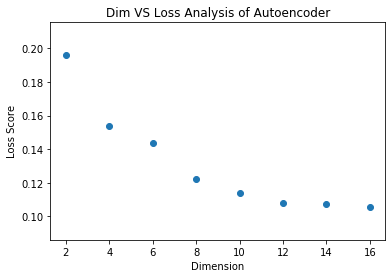

In [39]:
plt.scatter(loss_score.keys(), loss_score.values())
plt.title("Dim VS Loss Analysis of Autoencoder")
plt.xlabel("Dimension")
plt.ylabel("Loss Score")

# 2. using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?

In [95]:
# encode and decode testing data.
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
train = np.random.shuffle(decoded_imgs)
train,test = decoded_imgs[:1000,:],decoded_imgs[1000:,:]
print(train.shape, test.shape)
print(decoded_imgs)
#x_train.shape

(1000, 784) (9000, 784)
[[0.0000000e+00 2.0861626e-07 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0132790e-06]
 [3.2395124e-05 4.0060282e-04 3.4272671e-06 ... 4.6432018e-05
  5.1558018e-06 1.6570091e-05]
 [0.0000000e+00 8.3446503e-07 0.0000000e+00 ... 1.4901161e-07
  1.1920929e-07 2.3841858e-07]
 ...
 [8.9406967e-08 0.0000000e+00 0.0000000e+00 ... 2.0861626e-06
  0.0000000e+00 0.0000000e+00]
 [2.3841858e-07 4.7683716e-07 3.8444996e-06 ... 0.0000000e+00
  4.4703484e-07 0.0000000e+00]
 [1.7881393e-07 1.1920929e-07 1.1920929e-07 ... 0.0000000e+00
  2.6643276e-05 1.1026859e-06]]


In [109]:
x_train,x_test = train_test_split(decoded_imgs)
x_train.shape,x_test.shape

((7500, 784), (2500, 784))

In [112]:
# the data, shuffled and split between train and test sets

x_train = x_train.reshape(7500, 784)
x_test = x_test.reshape(2500, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_test.shape, x_train.shape

((2500, 784), (7500, 784))

In [149]:
initial_mlnn_loss = []


model = Sequential()
model.add(Dense(784, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(784, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, x_train,
                    batch_size=10,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, x_test))

score = model.evaluate(x_test, x_test, verbose=0)
initial_mlnn_loss.append(model.evaluate(x_test, x_test, verbose=0))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 784)               615440    
_________________________________________________________________
dropout_98 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_250 (Dense)            (None, 10)                7850      
_________________________________________________________________
dropout_99 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_251 (Dense)            (None, 784)               8624      
Total params: 631,914
Trainable params: 631,914
Non-trainable params: 0
_________________________________________________________________
Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 4s 471us/

# 3. apply noise to *_only_* the input of the autoencoder (not the output). demonstrate that your autoencoder can strip out noise.

In [ ]:
# gather data and split into training and testing vars.
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.

xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape
ytest.shape

In [129]:
loss_score_noise = {}
for iter_dim in range(2,18,2):
    # this is the size of our encoded representations
    encoding_dim = iter_dim  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

    # this is our input placeholder
    x = input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)


    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    # create the decoder model
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

    # compile autoencoder 
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    
    autoencoder.fit(random_noise(xtrain), xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(random_noise(xtest), xtest))
    
    loss_score_noise[iter_dim] = autoencoder.evaluate(xtrain, xtrain, verbose = 0)



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 153us/step - loss: 0.4503 - val_loss: 0.2654
Epoch 2/100
60000/60000 [==============================] - 4s 58us/step - loss: 0.2611 - val_loss: 0.2576
Epoch 3/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2553 - val_loss: 0.2536
Epoch 4/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.2524 - val_loss: 0.2518
Epoch 5/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.2511 - val_loss: 0.2511
Epoch 6/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.2501 - val_loss: 0.2509
Epoch 7/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.2490 - val_loss: 0.2496
Epoch 8/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.2476 - val_loss: 0.2472
Epoch 9/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.2460 - val_loss: 0.

In [133]:
loss_score,loss_score_noise

({2: 0.19573124536673228,
  4: 0.15351997696956,
  6: 0.14371606947580973,
  8: 0.12235987691084543,
  10: 0.11384244225819906,
  12: 0.10793483013709386,
  14: 0.10745247059265772,
  16: 0.1057592625617981},
 {2: 0.20028356336752573,
  4: 0.15801826189359028,
  6: 0.14310619707107544,
  8: 0.13236936440467834,
  10: 0.12814583059151968,
  12: 0.11356325762669245,
  14: 0.11811600044171015,
  16: 0.10873440016508103})

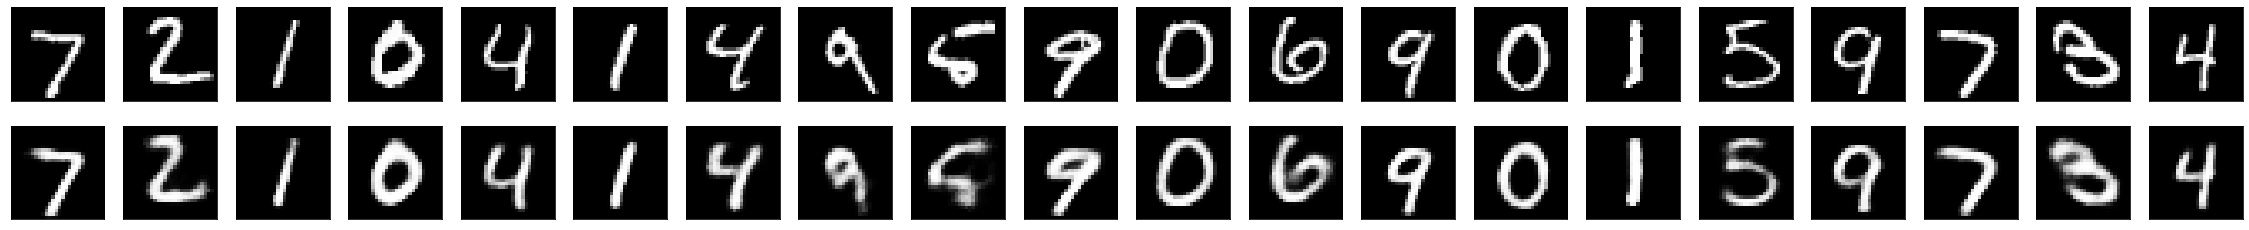

In [156]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()